<a href="https://colab.research.google.com/github/KuzmenkoO/amazinum_home_work/blob/main/lesson_9_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import h5py # common package to interact with a dataset that is stored on an H5 file.
import os

Brest Cancer Dataset

In [2]:
X, y = load_breast_cancer(return_X_y= True)
print ('X.shape= ', X.shape)
print ('y.shape= ', y.shape)

# YOUR_CODE.  Preproces data, train classifier and evaluate the perfromance on train and test sets
# START_CODE
X_train, X_test, y_train, y_test  =  train_test_split(X, y, random_state= 0)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = MLPClassifier(
    solver= 'lbfgs',
    hidden_layer_sizes= (100,100),
    random_state = 10,
    alpha = 10
).fit(X_train_scaled,y_train)
print("train accuracy= {:.3%}".format(clf.score(X_train_scaled, y_train)))
print("test accuracy= {:.3%}".format(clf.score(X_test_scaled, y_test)))
# END_CODE

X.shape=  (569, 30)
y.shape=  (569,)
train accuracy= 98.826%
test accuracy= 97.902%


Signs dataset¶

In [3]:
cwd= os.getcwd() # current working directory
path = os.path.join(cwd,'data')

# signs data set (fingers)
def load_dataset():
    fn = os.path.join(path, 'train_signs.h5')
    train_dataset = h5py.File(fn, "r")
    X_train = np.array(train_dataset["train_set_x"][:])  # your train set features
    y_train = np.array(train_dataset["train_set_y"][:])  # your train set labels

    fn = os.path.join(path, 'test_signs.h5')
    test_dataset = h5py.File(fn, "r")
    X_test = np.array(test_dataset["test_set_x"][:])  # your test set features
    y_test = np.array(test_dataset["test_set_y"][:])  # your test set labels

    classes = np.array(test_dataset["list_classes"][:])  # the list of classes

    y_train = y_train.reshape((1, y_train.shape[0]))
    y_test = y_test.reshape((1, y_test.shape[0]))

    return X_train, y_train, X_test, y_test, classes

X_train, y_train, X_test, y_test, classes = load_dataset()
y_train = y_train.ravel()
y_test = y_test.ravel()
print ('X_train.shape=', X_train.shape)
print ('X_test.shape=', X_test.shape)
print ('y_train.shape=', y_train.shape)
print ('y_test.shape=', y_test.shape)

X_train.shape= (1080, 64, 64, 3)
X_test.shape= (120, 64, 64, 3)
y_train.shape= (1080,)
y_test.shape= (120,)


number of training examples = 12288
number of test examples = 12288
X_train_scaled shape: (1080, 12288)
X_test_scaled shape: (120, 12288)


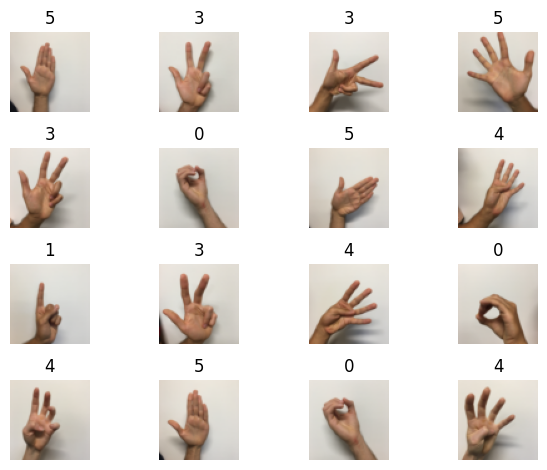

In [5]:
def display_samples_in_grid(X, n_rows, n_cols= None, y = None ):
    if n_cols is None:
        n_cols= n_rows
    indices = np.random.randint(0, len(X),n_rows*n_cols)
    for i in range (n_rows):
        for j in range (n_cols):
            index = n_rows*i+j
            ax = plt.subplot(n_rows,n_cols,index+1)
            plt.imshow(X[indices[index]])
            if not (y is None):
                plt.title(y[indices[index]])
            plt.axis('off')

    plt.tight_layout(h_pad=1)

plt.figure()

display_samples_in_grid(X_train, n_rows=4, y= y_train)

# plt.gcf().canvas.set_window_title('Train set')


# YOUR_CODE.  Preproces data
# START_CODE
X_train_ = X_train.reshape(X_train.shape[0], -1)
X_test_ = X_test.reshape(X_test.shape[0], -1)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_)
X_test_scaled = scaler.transform(X_test_)
# END_CODE

print ("number of training examples = " + str(X_train_scaled.shape[1]))
print ("number of test examples = " + str(X_test_scaled.shape[1]))
print ("X_train_scaled shape: " + str(X_train_scaled.shape))
print ("X_test_scaled shape: " + str(X_test_scaled.shape))

train accuracy= 100.000%
test accuracy= 92.500%


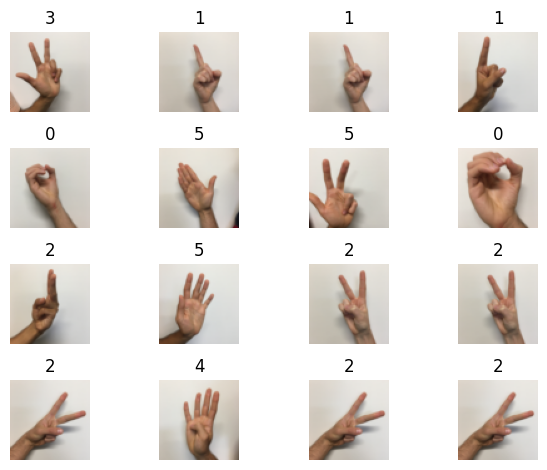

In [12]:
# YOUR_CODE.  Train classifier and evaluate the perfromance on train and test sets
# START_CODE
clf= MLPClassifier(
    hidden_layer_sizes=(100, 100),
    activation='relu',
    solver='adam',
    alpha=1e-4,
    learning_rate='adaptive',
    max_iter=100,
    random_state=10
).fit(X_train_scaled,y_train)

print("train accuracy= {:.3%}".format(clf.score(X_train_scaled, y_train)))
print("test accuracy= {:.3%}".format(clf.score(X_test_scaled, y_test)))
# END_CODE

plt.figure()

predicted = clf.predict(X_test_scaled)

display_samples_in_grid(X_test, n_rows=4, y= predicted)

# plt.gcf().canvas.set_window_title('Test set prediction')

In [13]:
# Compare with SVM¶
from sklearn.svm import SVC
clf = SVC(C=10, kernel='rbf', gamma=0.001).fit(X_train_scaled, y_train)
print("train accuracy= {:.3%}".format(clf.score (X_train_scaled, y_train)))
print("test accuracy= {:.3%}".format(clf.score (X_test_scaled, y_test)))

train accuracy= 100.000%
test accuracy= 65.000%
